# TP1 - Pandas y Visualización de datos

P22. En las películas a veces se habla en otros idiomas distintos al original, ya sea de forma continua como en Inglorius Basterds o de forma aislada como el francés en el fín de la película Jumanji. Para los 15 idiomas más comunes hablados en las películas muestre con un heatmap sencillo la matriz de correlación entre ellos.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
peliculas_original = pd.read_csv("/content/drive/MyDrive/Organización de Datos/TP1/Movie dataset/movies.csv")

In [10]:
pelis = peliculas_original[ ["title", "spoken_languages"] ].dropna()

def transformar_idiomas(idioma):
  idioma = str(idioma)
  idioma = idioma.replace("[", "").replace("]", "").replace("{", "").replace("}", "").replace(" ", "").replace(":", ",").replace("'", "")
  idioma = idioma.split(",")
  codigos_idiomas = []
  for palabra in idioma:
    if len(palabra) == 2:
      codigos_idiomas.append(palabra)
  return codigos_idiomas

pelis["spoken_languages"] = pelis["spoken_languages"].map(transformar_idiomas)
pelis_expandida = pelis.explode("spoken_languages")

top15 = pelis_expandida.groupby("spoken_languages").agg({"spoken_languages":"count"})
top15.columns = ["apariciones"]
top15 = top15.sort_values(by=["apariciones"], ascending = False)
top15 = top15.loc[top15.index[0] : top15.index[14]]

top15 = list(top15.index)
traduccion = {"en":"Inglés", "fr":"Francés", "de":"Alemán", "es":"Español", "it":"Italiano",
              "ja":"Japonés", "ru":"Ruso", "zh":"Chino", "hi":"Hindi", "pt":"Portugués",
              "sv":"Sueco", "ko":"Coreano", "pl":"Polaco", "cn":"Chino de PRC", "fi":"Finlandés"}

for idioma in top15:
  pelis[idioma] = pelis["spoken_languages"].apply(lambda x : x.count(idioma))

pelis.rename(columns=traduccion, inplace=True)

corr_idiomas = pelis.corr()
corr_idiomas[corr_idiomas.select_dtypes(include=['number']).columns] *= 100
corr_idiomas = corr_idiomas.round().astype(int)

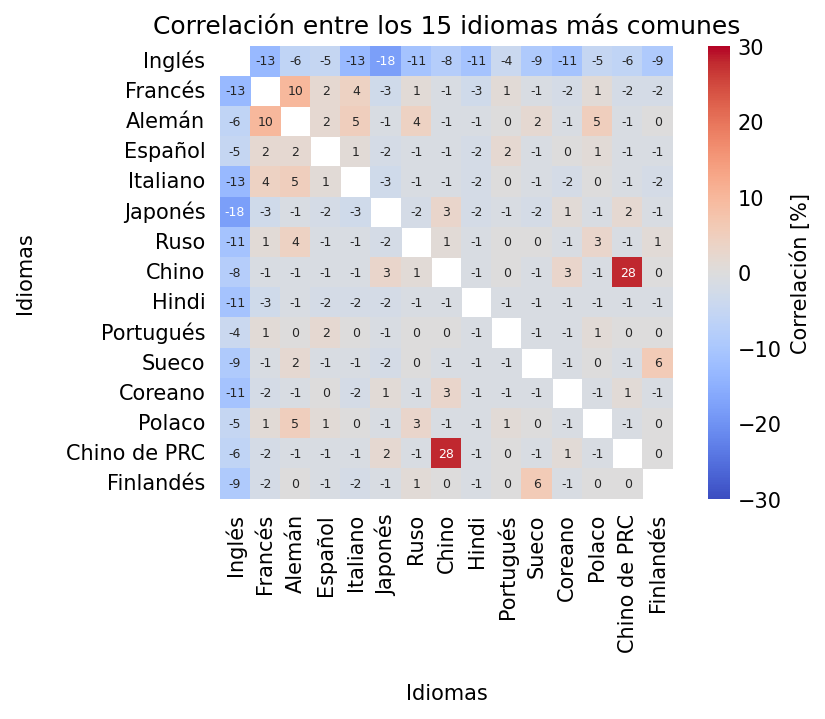

In [11]:
plt.figure(dpi=150)
grafico = sns.heatmap(corr_idiomas, vmin=-30, vmax=30, annot=True, square=True, mask=(corr_idiomas==100), annot_kws={"size":6}, cbar_kws={ "label" : "Correlación [%]"}, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.title("Correlación entre los 15 idiomas más comunes")
plt.xlabel("Idiomas", labelpad=15)
plt.ylabel("Idiomas", labelpad=15)
grafico.tick_params(left=False, bottom=False)
cbar = grafico.collections[0].colorbar
cbar.ax.tick_params(size=0)